In [ ]:
import pandas as pd
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
# Define the path to the directory containing the xlsx files
high_package_path = "/home/cedric/Desktop/cellulose/Case_Nuclear/Data_HighPackage.xlsx"
link_path = "/home/cedric/Desktop/cellulose/Case_Nuclear/DataLinkLowHigh.xlsx"
low_after="/home/cedric/Desktop/cellulose/Case_Nuclear/LowPackage_From_2010.xlsx"
low_before="/home/cedric/Desktop/cellulose/Case_Nuclear/LowPackage_Before_2010.xlsx"
# List to store data from the specific files
data_frames = []

# Process the High Package file
df_high = pd.read_excel(high_package_path, header=1, names=["id", "prodyear", "master_name", "mass_kg"])

# Process the Low Package file
df_low = pd.read_excel(
    low_before,
    header=1,
    names=[
        "prodyear", "producer", "colli_name", "send_date", "receipt_date",
        "state", "condition", "material", "mass_pack", "volume_L",
        "mass", "ACT_BETA_GAMMA", "act_alpha", "Dose_Debit",
        "measure_date", "acceptor"
    ],
)

df_low_after = pd.read_excel(
    low_after,
    header=1,
    names=[
        "prodyear", "producer", "colli_name", "send_date", "receipt_date",
        "state", "condition", "material", "mass_pack", "volume_L",
        "mass", "ACT_BETA_GAMMA", "act_alpha", "Dose_Debit",
        "measure_date", "acceptor"
    ],
)

# Process the Data Link Low High file
df_link = pd.read_excel(
    link_path,
    header=1,
    names=["colli_name", "index", "master_pack"],
)

# Filter df_link to only keep rows where colli_name is in df_low
df_link = df_link[df_link["colli_name"].isin(df_low["colli_name"])]

df_high = df_high[df_high["master_name"].isin(df_link["master_pack"])]

# Filter df_link to only keep rows where colli_name is in df_low
df_link_after = df_link[df_link["colli_name"].isin(df_low_after["colli_name"])]

# Merge High and Link on master_name/master_pack
merged_high_link = pd.merge(df_high, df_link, left_on="master_name", right_on="master_pack", how="inner")
merged_high_link_after = pd.merge(df_high, df_link_after, left_on="master_name", right_on="master_pack", how="inner")
# Merge the result with Low on colli_name
final_data = pd.merge(merged_high_link, df_low, on="colli_name", how="inner")
final_data_after = pd.merge(merged_high_link, df_low_after, on="colli_name", how="inner")

# Add the final merged data to the list
data_frames.append(final_data)

low_low_package_path = "/home/cedric/Desktop/cellulose/Case_Nuclear/Data_LowLowPackage.xlsx"

# Combine all data into a single DataFrame (optional)
combined_data = pd.concat(data_frames, ignore_index=True)

# Print the combined data (optional)
print(combined_data)

# LOW LOW
df_low_low = pd.read_excel(
    low_low_package_path,
    header=1,
    names=[
        "unnamed:0", "production_year", "colli_name", "condition",
        "state", "material", "mass", "mass_concrete", "mass_metal",
        "mass_plastic", "cellulose"
    ],
)

print(df_low_low)

# Merge df_low_low with final_data on colli_name
merged_data = pd.merge(df_low_low, final_data, on="colli_name", how="inner")


merged_data_after = pd.merge(df_low_low, final_data_after, on="colli_name", how="inner")

         id  prodyear_x     master_name     mass_kg colli_name      index  \
0      7295        1987  MASTER-87-0002  433.434729  P-10-0483  P-10-0483   
1      7295        1987  MASTER-87-0002  433.434729  P-11-0242  P-11-0242   
2      7295        1987  MASTER-87-0002  433.434729  P-11-0463  P-11-0463   
3      7295        1987  MASTER-87-0002  433.434729  P-11-2065  P-11-2065   
4      7295        1987  MASTER-87-0002  433.434729  P-12-1209  P-12-1209   
...     ...         ...             ...         ...        ...        ...   
32467  9151        2199  MASTER-99-1173  676.026358  P-15-0343  P-15-0343   
32468  9151        2199  MASTER-99-1173  676.026358  P-15-0967  P-15-0967   
32469  9151        2199  MASTER-99-1173  676.026358  P-15-1139  P-15-1139   
32470  9151        2199  MASTER-99-1173  676.026358  P-15-1444  P-15-1444   
32471  9143        2199  MASTER-99-1176  661.964894  P-10-0902  P-10-0902   

          master_pack  prodyear_y producer  send_date  ...        condition

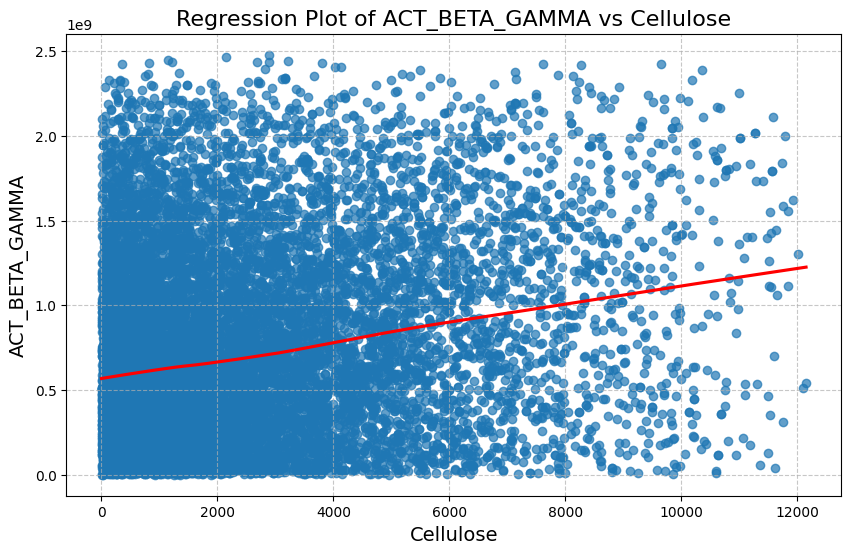

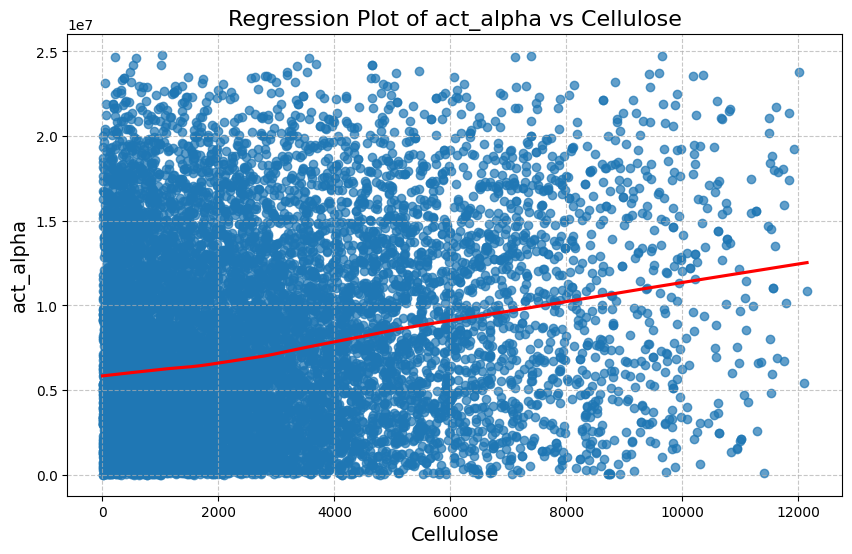

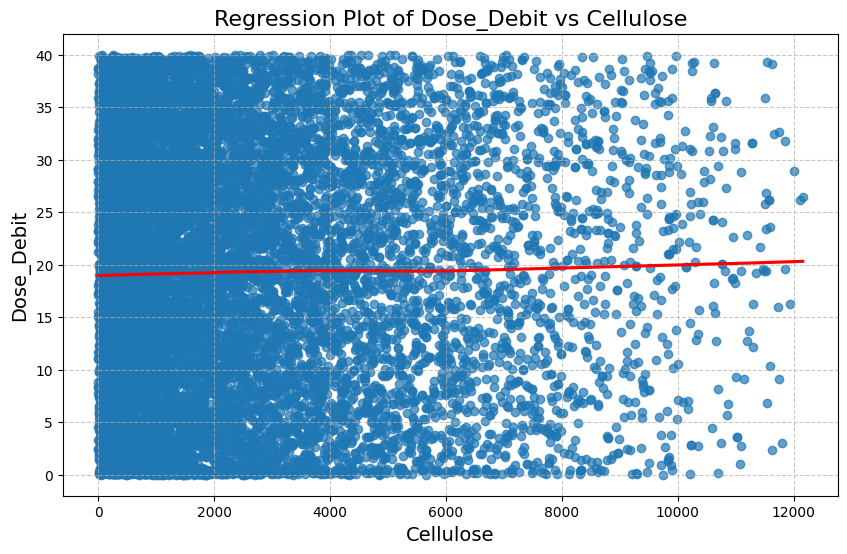

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

# Regression plot of ACT_BETA_GAMMA vs cellulose
plt.figure(figsize=(10, 6))
sns.regplot(x='cellulose', y='ACT_BETA_GAMMA', data=merged_data, scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'}, lowess=True)
plt.title('Regression Plot of ACT_BETA_GAMMA vs Cellulose', fontsize=16)
plt.xlabel('Cellulose', fontsize=14)
plt.ylabel('ACT_BETA_GAMMA', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Regression plot of act_alpha vs cellulose
plt.figure(figsize=(10, 6))
sns.regplot(x='cellulose', y='act_alpha', data=merged_data, scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'}, lowess=True)
plt.title('Regression Plot of act_alpha vs Cellulose', fontsize=16)
plt.xlabel('Cellulose', fontsize=14)
plt.ylabel('act_alpha', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Regression plot of Dose_Debit vs cellulose
plt.figure(figsize=(10, 6))
sns.regplot(x='cellulose', y='Dose_Debit', data=merged_data, scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'}, lowess=True)
plt.title('Regression Plot of Dose_Debit vs Cellulose', fontsize=16)
plt.xlabel('Cellulose', fontsize=14)
plt.ylabel('Dose_Debit', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#Confirms non linear


In [50]:
# Filter merged_data to only include rows where colli_name exists in df_fraction
rows_with_colli_name = merged_data[merged_data['colli_name'].isin(df_fraction['colli_name'])]

# Print the number of rows
print(f"Number of rows in merged_data with colli_name in df_fraction: {len(rows_with_colli_name)}")

Number of rows in merged_data with colli_name in df_fraction: 0


In [2]:
# Create a hard copy of the merged_data
cleaned_data = merged_data_after.copy()

# Drop rows with missing values
cleaned_data.dropna(inplace=True)

# Remove outliers in numerical columns using the interquartile range (IQR) method
numerical_columns = ['mass_x', 'mass_concrete', 'mass_metal', 'mass_plastic', 'cellulose', 
                     'ACT_BETA_GAMMA', 'act_alpha', 'Dose_Debit']
for col in numerical_columns:
    Q1 = cleaned_data[col].quantile(0.25)
    Q3 = cleaned_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]

# Convert categorical columns to consistent formats (e.g., lowercase)
categorical_columns = ['condition_x', 'state_x', 'material_x', 'producer']
for col in categorical_columns:
    cleaned_data[col] = cleaned_data[col].str.lower()

# Ensure numerical columns are of the correct data type
for col in numerical_columns:
    cleaned_data[col] = pd.to_numeric(cleaned_data[col], errors='coerce')

# Drop rows with invalid numerical values (e.g., negative values in columns that should be positive)
cleaned_data = cleaned_data[(cleaned_data[numerical_columns] >= 0).all(axis=1)]

# Reset the index after cleaning
cleaned_data.reset_index(drop=True, inplace=True)

# Print a summary of the cleaned data
print(cleaned_data.info())
print(cleaned_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11469 entries, 0 to 11468
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   unnamed:0        11469 non-null  int64         
 1   production_year  11469 non-null  int64         
 2   colli_name       11469 non-null  object        
 3   condition_x      11469 non-null  object        
 4   state_x          11469 non-null  object        
 5   material_x       11469 non-null  object        
 6   mass_x           11469 non-null  float64       
 7   mass_concrete    11469 non-null  float64       
 8   mass_metal       11469 non-null  float64       
 9   mass_plastic     11469 non-null  float64       
 10  cellulose        11469 non-null  float64       
 11  id               11469 non-null  int64         
 12  prodyear_x       11469 non-null  int64         
 13  master_name      11469 non-null  object        
 14  mass_kg          11469 non-null  float

In [15]:
# Load your data
df = cleaned_data

categoricals = ["condition_x", "state_x", "material_x", "producer"]
numericals = ["mass_x", "volume_L", "mass_y", "ACT_BETA_GAMMA", "act_alpha", "Dose_Debit"]
target = 'cellulose'

# Split features/target
X = df[categoricals + numericals]
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model (handles categoricals!)
model = HistGradientBoostingRegressor(categorical_features=[X.columns.get_loc(col) for col in categoricals])
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
# Calculate RMSE using mean_absolute_error for a different evaluation metric
rmse = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")


RMSE: 1387.29


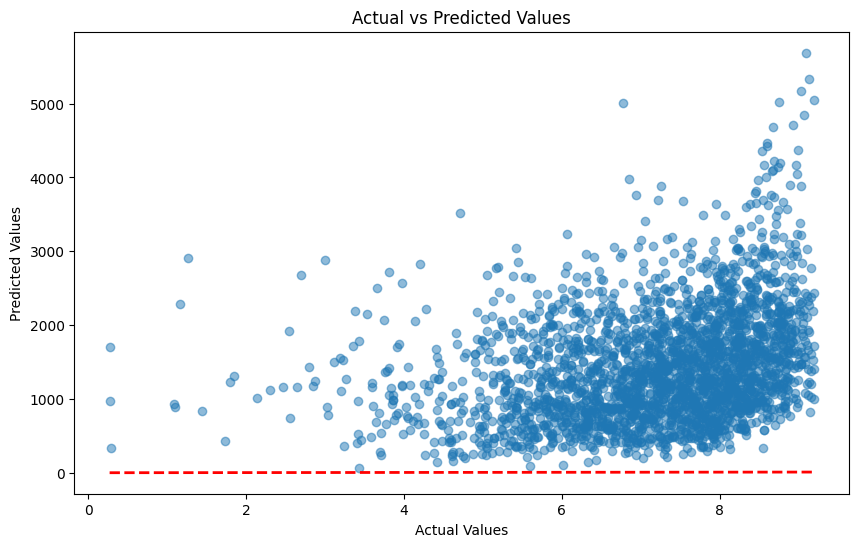

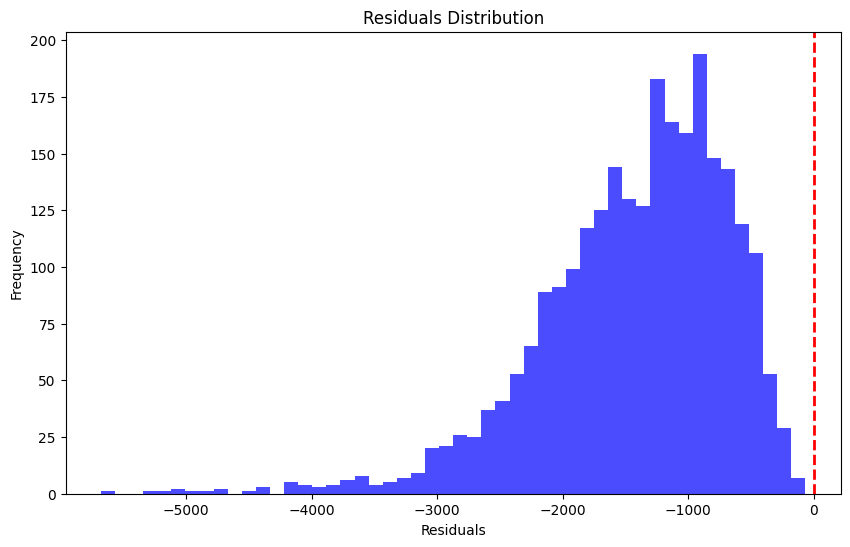

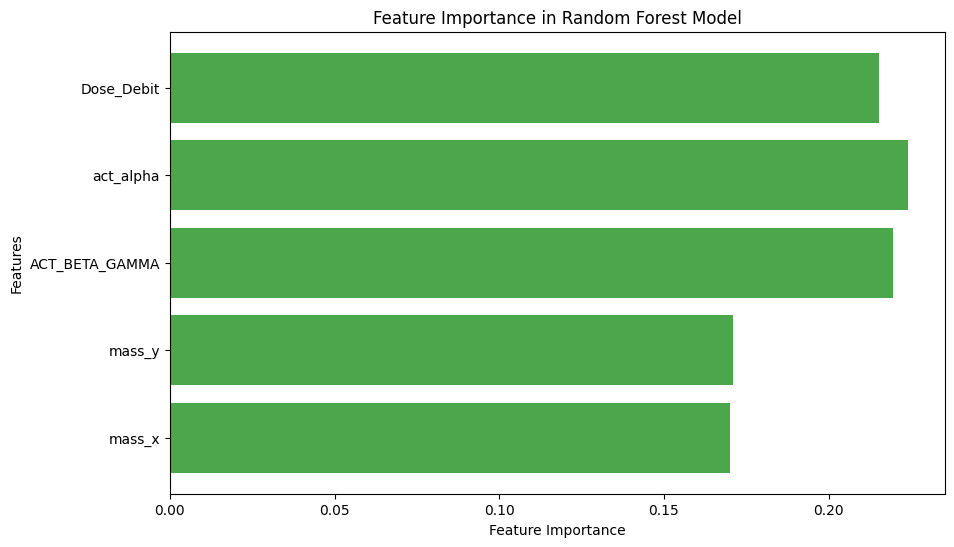

In [5]:
# Load your data
df = merged_data

categoricals = ["condition_x", "state_x", "material_x", "producer"]
numericals = ["mass_x", "volume_L", "mass_y", "ACT_BETA_GAMMA", "act_alpha", "Dose_Debit"]
target = 'cellulose'

# Split features/target
X_test = df[categoricals + numericals]
#y = df[target]

# Train/test split
# Predict and evaluate
y_pred = model.predict(X_test)

In [6]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Residuals Distribution (y_test - y_pred)', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

ValueError: operands could not be broadcast together with shapes (2294,) (13044,) 

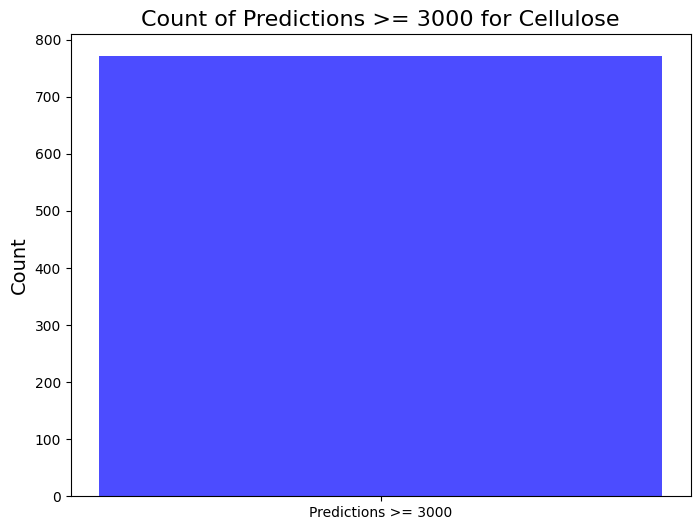

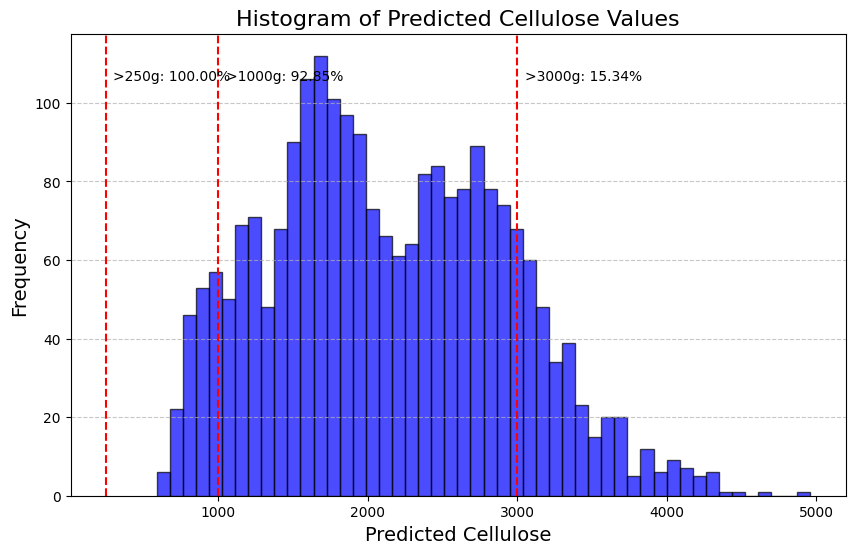

In [19]:
import matplotlib.pyplot as plt

# Plot histogram of predicted cellulose values
plt.figure(figsize=(10, 6))
plt.hist(y_pred, bins=50, color='blue', alpha=0.7, edgecolor='black')
thresholds = [250, 1000, 3000]
percent_above = [(y_pred > t).mean() * 100 for t in thresholds]
for t, p in zip(thresholds, percent_above):
    plt.axvline(x=t, color='red', linestyle='--')
    plt.text(t+50, plt.ylim()[1]*0.9, f'>{t}g: {p:.2f}%', color='black')
plt.title('Histogram of Predicted Cellulose Values', fontsize=16)
plt.xlabel('Predicted Cellulose', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [21]:
print((761/13044)*100)
print((2435/13044)*100)
print((2609/13044)*100)

5.83409996933456
18.66758662986814
20.001533272002455
